In [90]:
#Importing ibraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import joblib
import matplotlib.pyplot as plt

In [91]:
#Loading the data for dataset_1
from google.colab import files
uploaded = files.upload()

Saving mail_data.csv to mail_data (2).csv


In [92]:
# Check if the file is open
if os.access("mail_data.csv", os.R_OK):
    data = pd.read_csv("mail_data.csv", encoding='ISO-8859-1')
else:
    print("File is open or you don't have permission to access it.")
data = pd.read_csv("mail_data.csv", encoding='ISO-8859-1')#Read the CSV file

In [93]:
#Loading the dataset_2
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (3).csv


In [94]:
# Check if the file is open
if os.access("spam.csv", os.R_OK):
    data2 = pd.read_csv("spam.csv", encoding='ISO-8859-1')
else:
    print("File is open or you don't have permission to access it.")
data2 = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [95]:
#Loading the dataset_3
from google.colab import files
uploaded = files.upload()

Saving Spam-Classification.csv to Spam-Classification (1).csv


In [96]:
# Check if the file is open
if os.access("Spam-Classification.csv", os.R_OK):
    data3 = pd.read_csv("Spam-Classification.csv", encoding='ISO-8859-1')
else:
    print("File is open or you don't have permission to access it.")
data3 = pd.read_csv("Spam-Classification.csv", encoding='ISO-8859-1')#Read the CSV file

In [97]:
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [98]:
print(data2.tail())

        v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  


In [99]:
print(data3.head())

  ï»¿Class                                                SMS
0      ham   said kiss, kiss, i can't do the sound effects...
1      ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2     spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3     spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4     spam  **FREE MESSAGE**Thanks for using the Auction S...


In [113]:
print(data2.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [114]:
print(data.isnull().sum())

Category    0
Message     0
dtype: int64


In [115]:
print(data3.isnull().sum())

ï»¿Class    0
SMS         0
dtype: int64


In [116]:
# Combine the 'Category' and 'v1' into a single labels Series
Y = pd.concat([data['Category'], data2['v1'],data3['ï»¿Class']], ignore_index=True)

# Combine the 'Message' and 'v2' into a single messages Series
X = pd.concat([data['Message'], data2['v2'],data3['SMS']], ignore_index=True)

X,Y

(0        Go until jurong point, crazy.. Available only ...
 1                            Ok lar... Joking wif u oni...
 2        Free entry in 2 a wkly comp to win FA Cup fina...
 3        U dun say so early hor... U c already then say...
 4        Nah I don't think he goes to usf, he lives aro...
                                ...                        
 12639         Yup, no need. I'll jus wait 4 e rain 2 stop.
 12640    Yup... From what i remb... I think should be c...
 12641                           Yup... How ÃÂ¼ noe leh...
 12642    Yup... Ok i go home look at the timings then i...
 12643    <Forwarded from 21870000>Hi - this is your Mai...
 Length: 12644, dtype: object,
 0         ham
 1         ham
 2        spam
 3         ham
 4         ham
          ... 
 12639     ham
 12640     ham
 12641     ham
 12642     ham
 12643    spam
 Length: 12644, dtype: object)

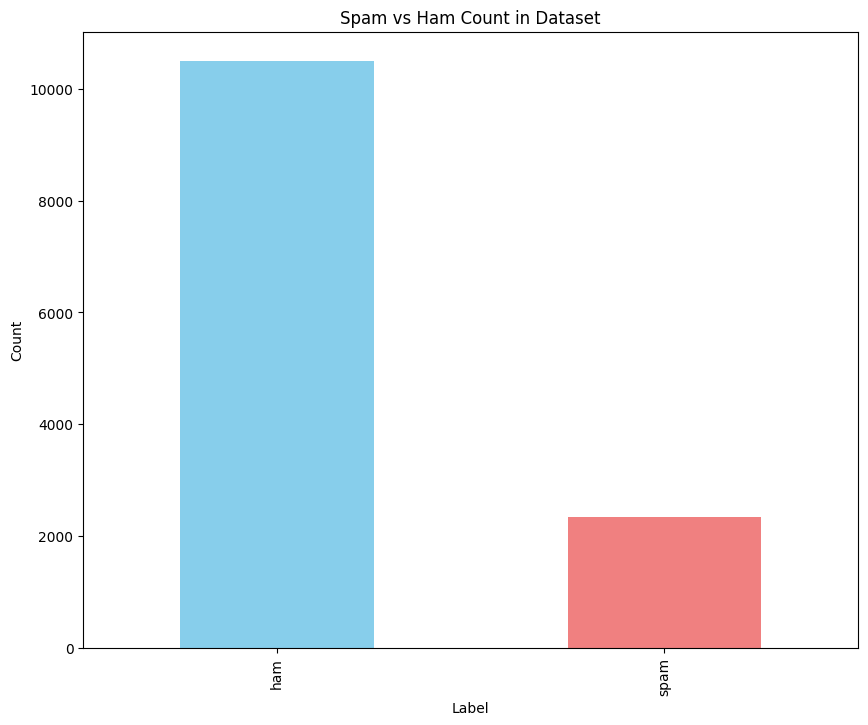

In [117]:
label_counts = data['Category'].value_counts() + data2['v1'].value_counts()+data3['ï»¿Class'].value_counts()+100

plt.figure(figsize=(10,8))
label_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Spam vs Ham Count in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

In [118]:
# Changing the labels from 'ham' and 'spam' to 0 and 1
Y=LabelEncoder().fit_transform(Y)

In [121]:
# Splitting the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
# Converting the messages into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()
X_train_tfidf, X_test_tfidf

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [143]:
#Training the model
model = LogisticRegression()

In [144]:
model.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [145]:
#Accuracy for the training data
prediction_on_training_data = model.predict(X_train_tfidf)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)


In [146]:
#Printing the accuracy for the training data
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9871478002965892


In [147]:
#Accuracy for the test data
prediction_on_test_data = model.predict(X_test_tfidf)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [148]:
#Printing the accuracy for the test data
print('Accuracy on test data: ', accuracy_on_test_data)

Accuracy on test data:  0.9873467773823645


In [152]:
#Prediction and testing the model

input_your_mail = ['Free entry in 2 a wkly comp to win FA Final tkts @21st October 2024. Send FA to 24157321 to receive entry question(std txt rate) TCs applied 12653258-75`5924']

#Converting the text to feature vector
input_data_features = vectorizer.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if(prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Spam mail
